In [4]:
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
from sklearn.impute import SimpleImputer

biomass_data= pd.read_csv('site_data.csv')
# Transpose the DataFrame to have products as rows and locations as columns
data_transposed = biomass_data.set_index(['dataset', 'site_name', 'site_id', 'X', 'Y']).T

# Remove non-numeric rows
data_transposed_numeric = data_transposed.select_dtypes(include=[np.number])

# Replace 'NA' with NaN
data_transposed_numeric = data_transposed_numeric.replace('NA', np.nan)

# Drop rows with all NaN values
data_transposed_numeric = data_transposed_numeric.dropna(axis=1, how='all')

# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
# Impute missing values with ROW mean (must use transposed df and axis=1 for rows)
df = data_transposed_numeric.T.fillna(data_transposed_numeric.mean(axis=1)).T

In [6]:
df

dataset                    NEON                                             \
site_name        Harvard Forest Smithsonian Conservation Biology Institute   
site_id                    HARV                                       SCBI   
X                   -72.172660                                 -78.139500    
Y                     42.536900                                  38.892920   
ESA CCI               21.046901                                  21.046901   
Chopping et al.       18.783055                                  18.783055   
GEDI L4B             164.080719                                 334.279755   
Liu et al.            37.921211                                 115.212837   
LT-GNN                31.403246                                  31.403246   
Menlove & Healey     114.922806                                 106.782768   
Xu et al.             69.325028                                  69.325028   

dataset                                                         \
site_name        Ordway-Swisher Biological Station      UNDERC   
site_id                                       OSBS        UNDE   
X                                      -81.993430  -89.537250    
Y                                        29.689270   46.233880   
ESA CCI                                  21.046901   21.046901   
Chopping et al.                          18.783055   18.783055   
GEDI L4B                                 63.379155  155.069643   
Liu et al.                               69.890287  139.331772   
LT-GNN                                   31.403246   31.403246   
Menlove & Healey                         42.734001   91.699257   
Xu et al.                                69.325028   69.325028   

dataset                                                        \
site_name        Konza Prairie Biological Station   Oak Ridge   
site_id                                      KONZ        ORNL   
X                                     -96.563090  -84.282600    
Y                                       39.100770   35.964120   
ESA CCI                                 21.046901   21.046901   
Chopping et al.                         18.783055   18.783055   
GEDI L4B                                 7.477551  162.482702   
Liu et al.                              10.838812   91.845345   
LT-GNN                                  31.403246   31.403246   
Menlove & Healey                        10.135107  115.705890   
Xu et al.                               69.325028   69.325028   

dataset                                                 \
site_name        Talladega National Forest   Woodworth   
site_id                               TALL        WOOD   
X                              -87.393270  -99.241356    
Y                                32.950460   47.128228   
ESA CCI                          21.046901   21.046901   
Chopping et al.                  18.783055   18.783055   
GEDI L4B                        228.355491    4.161302   
Liu et al.                       85.784576    9.719982   
LT-GNN                           31.403246   31.403246   
Menlove & Healey                125.903267    0.000000   
Xu et al.                        69.325028   69.325028   

dataset                                                                    \
site_name        Central Plains Experimental Range LBJ National Grassland   
site_id                                       CPER                   CLBJ   
X                                      -104.745602            -97.570000    
Y                                        40.815534              33.401230   
ESA CCI                                  21.046901              21.046901   
Chopping et al.                           0.000000              18.783055   
GEDI L4B                                  1.268689              17.868778   
Liu et al.                                9.621728              11.764260   
LT-GNN                                   31.403246              31.403246   
Menlove & Healey      

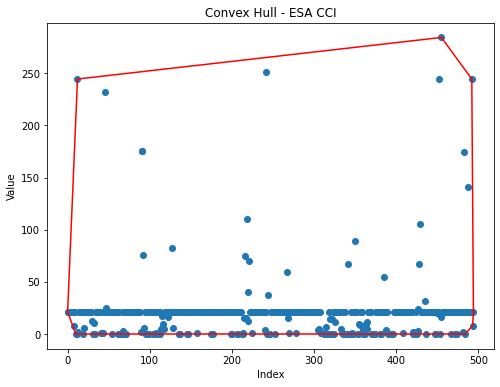

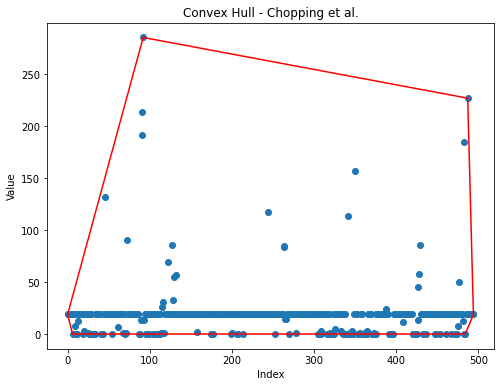

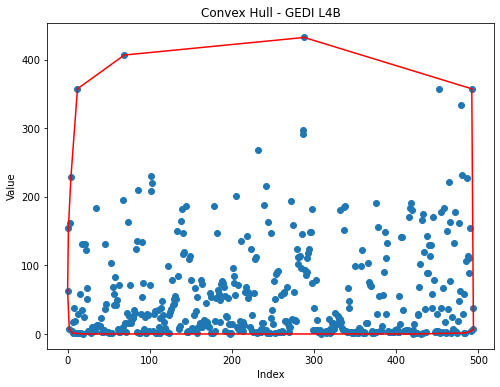

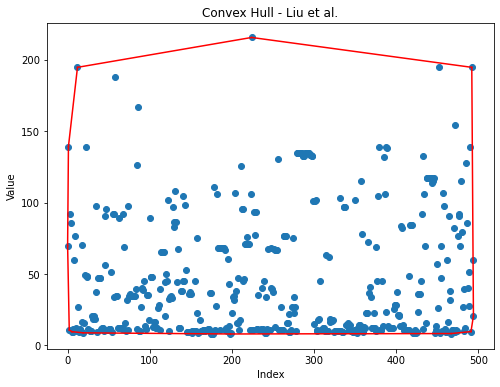

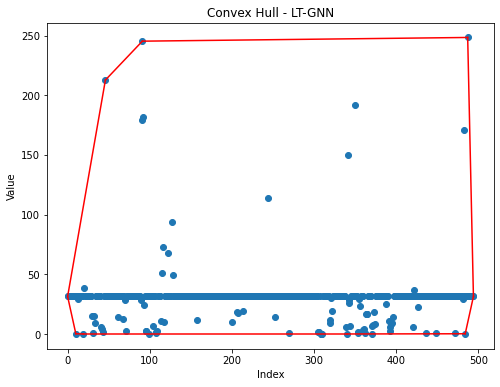

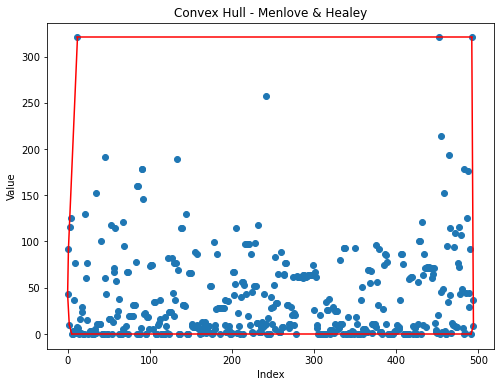

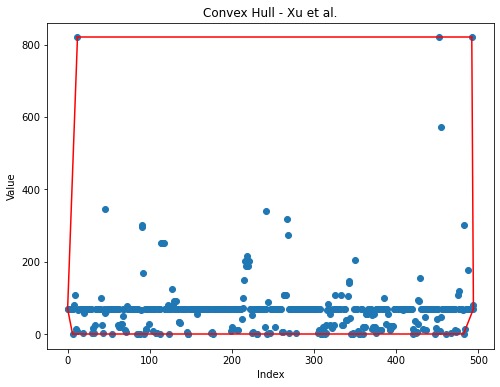

In [10]:
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

def plot_convex_hull(row):
    values = row.values[2:]  # Exclude the first two columns (index and name)
    values = values[~np.isnan(values)]  # Remove any NaN values
    points = np.column_stack((np.arange(len(values)), values))  # Create 2D points
    try:
        hull = ConvexHull(points)
        plt.figure(figsize=(8, 6))
        plt.plot(points[:, 0], points[:, 1], 'o')
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
        plt.title(f"Convex Hull - {row.name}")
        plt.xlabel("Index")
        plt.ylabel("Value")
        plt.show()
    except:
        print(f"Cannot plot convex hull for {row.name} due to insufficient points.")

# Assuming your dataframe is named 'df'
for _, row in df.iterrows():
    plot_convex_hull(row)